# Data Exploration with Python

(Review Reading Assignments: Analyzing Tabular Omics Data using Pandas DataFrames, and Data Visualization/Data Visualization with Seaborn)

## 1. Explore [this dataset on infectious diseases from the CA Dept. of Public Health](https://catalog.data.gov/dataset/infectious-diseases-by-disease-county-year-and-sex-d8912).

In [ ]:
# How can you download the dataset using Python functions?
from urllib.request import urlretrieve

In [ ]:
dataset_url = 'https://data.chhs.ca.gov/dataset/03e61434-7db8-4a53-a3e2-1d4d36d6848d/resource/75019f89-b349-4d5e-825d-8b5960fc028c/download/odp_idb_2001_2022_ddg_compliant.csv'
data_file_name = 'dataset.csv'
urlretrieve(dataset_url, data_file_name)

('dataset.csv', <http.client.HTTPMessage at 0x7ccc163857b0>)

In [ ]:
# How can you make use of pandas dataframes to explore the dataset?
import pandas as pd

In [ ]:
df = pd.read_csv(data_file_name)

In [ ]:
# A useful attribute that tells you the rows and columns of a dataframe is `dataframe.shape`
df.shape

(189921, 9)

In [ ]:
# A useful function that shows you the first 5 rows of a dataframe is `dataframe.head()`
df.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,-,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,-,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,-,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,-,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,-,0.0,0.512


In [ ]:
df['Disease'].value_counts()

Anaplasmosis                                                                             3894
Anthrax                                                                                  3894
Lyme Disease                                                                             3894
Malaria                                                                                  3894
Paralytic Shellfish Poisoning                                                            3894
Paratyphoid Fever                                                                        3894
Plague, human                                                                            3894
Psittacosis                                                                              3894
Q Fever                                                                                  3894
Rabies, human                                                                            3894
Relapsing Fever                                             

In [ ]:
# How can you use `dataframe.loc[]` to subset the data and view aspects you're interested in?
df.loc[(df['County'] == 'Alameda') & (df['Year'] == 2022), :]

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
63,Anaplasmosis,Alameda,2022,Female,0.0,856569,-,0.000,0.431
64,Anaplasmosis,Alameda,2022,Male,0.0,832969,-,0.000,0.443
65,Anaplasmosis,Alameda,2022,Total,0.0,1638979,-,0.000,0.225
3957,Anthrax,Alameda,2022,Female,0.0,856569,-,0.000,0.431
3958,Anthrax,Alameda,2022,Male,0.0,832969,-,0.000,0.443
...,...,...,...,...,...,...,...,...,...
184852,Yersiniosis,Alameda,2022,Male,5.0,832969,0.600*,0.195,1.401
184853,Yersiniosis,Alameda,2022,Total,20.0,1638979,1.220,0.745,1.885
188700,Zika Virus Infection,Alameda,2022,Female,1.0,856569,0.117*,0.003,0.650
188701,Zika Virus Infection,Alameda,2022,Male,0.0,832969,-,0.000,0.443


In [ ]:
# The following line tells the notebook to display the figures when it's generated
%matplotlib inline

# Import seaborn
import seaborn as sns

# Apply a theme
sns.set_context("notebook", font_scale=1.0)

## 2. Select a disease of your choice. Plot the number of cases of that disease by county, for the year 2022.

In [ ]:
# What type of plot do you think would be useful?
# Here is an overview of seaborn's plotting functions: https://seaborn.pydata.org/tutorial/function_overview.html

disease_2022 = df.loc[(df['Year'] == 2022) & (df['Disease'] == 'Leprosy') & (df['Cases'] > 0)]

In [ ]:
disease_2022.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
87832,Leprosy,California,2022,Male,6.0,20041322,0.030*,0.011,0.065
87833,Leprosy,California,2022,Total,6.0,39028571,0.015*,0.006,0.033
88756,Leprosy,Los Angeles,2022,Male,2.0,5055561,0.040*,0.005,0.143
88757,Leprosy,Los Angeles,2022,Total,2.0,9792167,0.020*,0.002,0.074
89086,Leprosy,Merced,2022,Male,1.0,146192,0.684*,0.017,3.811


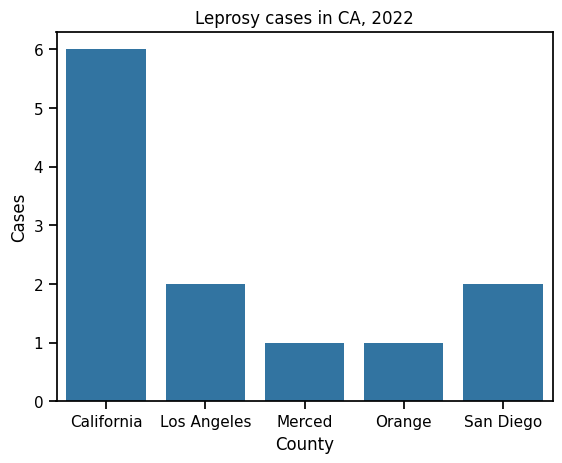

In [ ]:
ax = sns.barplot(data=disease_2022, y='Cases', x='County')
ax.set_title('Leprosy cases in CA, 2022')
ax.get_figure().savefig('leprosy.png')

## 3. Select a disease of your choice. Plot the number of cases of that disease in Los Angeles between the years 2001-2010.

In [ ]:
la_disease = df.loc[(df['Disease'] == 'Leprosy') & (df['Year'] <= 2010) & (df['Cases'] > 0) & (df['County'] == 'Los Angeles')]

In [ ]:
la_disease.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
88692,Leprosy,Los Angeles,2001,Female,2.0,4880163,0.041*,0.005,0.148
88693,Leprosy,Los Angeles,2001,Male,4.0,4755632,0.084*,0.023,0.215
88694,Leprosy,Los Angeles,2001,Total,6.0,9635795,0.062*,0.023,0.136
88695,Leprosy,Los Angeles,2002,Female,4.0,4924247,0.081*,0.022,0.208
88696,Leprosy,Los Angeles,2002,Male,7.0,4798197,0.146*,0.059,0.301


## 4. Create another plot of your choice, with an appropriate title.